# 투빅스 15기 1주차 과제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv("과제데이터.csv")

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# 결측치,이상치 확인 및 데이터 이해

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

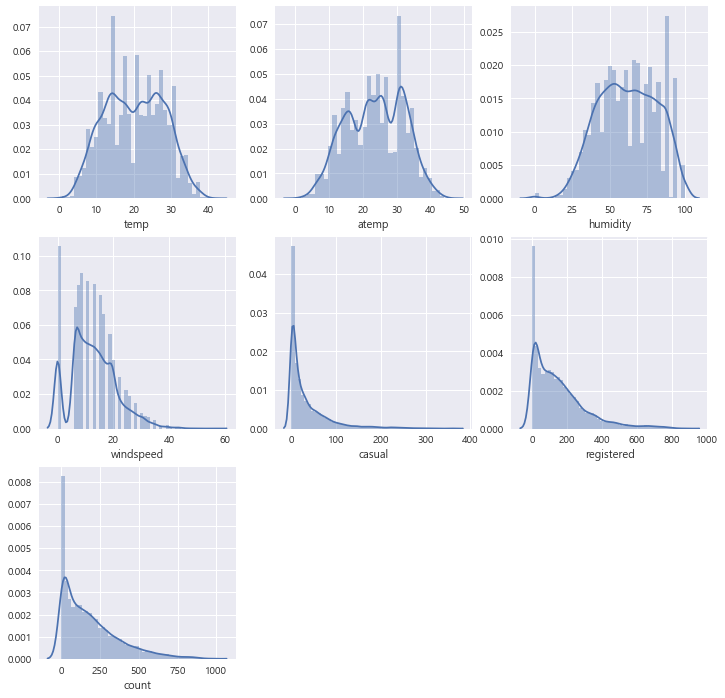

In [6]:
plt.figure(figsize = (12, 12))
plt.subplot(3, 3, 1)
sns.distplot(df.temp)
plt.subplot(3, 3, 2)
sns.distplot(df.atemp)
plt.subplot(3, 3, 3)
sns.distplot(df.humidity)
plt.subplot(3, 3, 4)
sns.distplot(df.windspeed)
plt.subplot(3, 3, 5)
sns.distplot(df.casual)
plt.subplot(3, 3, 6)
sns.distplot(df.registered)
plt.subplot(3, 3, 7)
sns.distplot(df['count'])

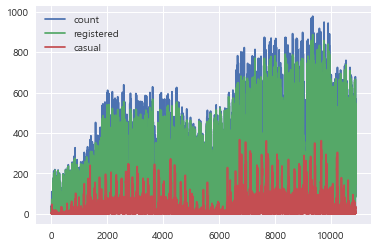

In [7]:
df[['count', 'registered', 'casual']].plot()

In [8]:
print(sorted(df.windspeed.unique()))

[0.0, 6.0032, 7.0015, 8.9981, 11.0014, 12.998, 15.0013, 16.9979, 19.0012, 19.9995, 22.0028, 23.9994, 26.0027, 27.9993, 30.0026, 31.0009, 32.9975, 35.0008, 36.9974, 39.0007, 40.9973, 43.0006, 43.9989, 46.0022, 47.9988, 50.0021, 51.9987, 56.9969]


+ numeric variable의 경우 casual, registered, count가 분포상 오른쪽으로 긴 꼬리를 가졌지만 이상치로 보기는 어려움
+ windspeed의 경우 다른 구간에서는 비교적 연속적인 값을 가지나 6.0032에서 바로 0으로 가는것은 자연스럽지 못하다고 판단함(6 미만의 풍속은 측정하지 못하거나 결측치를 0으로 대체한것이 아닌가 추측)
+ windspeed의 경우 대표값으로 대체하는 것은 힘들다고 판단하여 간단한 regressor를 사용해 대체할 것임

In [9]:
print("최소 datetime : %s, 최대 datetime : %s"%(df.datetime.min(), df.datetime.max()))

최소 datetime : 2011-01-01 00:00:00, 최대 datetime : 2012-12-19 23:00:00


In [10]:
df['year'] = df.datetime.apply(lambda x : int(x[:4]))
df['month'] = df.datetime.apply(lambda x : int(x[5:7]))
df['day'] = df.datetime.apply(lambda x : int(x[8:10]))
df['hour'] = df.datetime.apply(lambda x : int(x[11:13]))
df['weekday'] = pd.to_datetime(df.datetime).dt.weekday
df.drop("datetime", axis = 1, inplace = True)

print("월 :", df.month.unique())
print("일 :", df.day.unique())
print("시 :", df.hour.unique())
print("요일 :", df.weekday.unique())

월 : [ 1  2  3  4  5  6  7  8  9 10 11 12]
일 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
시 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
요일 : [5 6 0 1 2 3 4]


+ 2011년 1월 1일 00시부터 2012년 12월 19일까지 + 매월 19일까지 1시간 단위 데이터임을 알 수 있음

In [11]:
df.groupby("season")['month'].unique()

season
1       [1, 2, 3]
2       [4, 5, 6]
3       [7, 8, 9]
4    [10, 11, 12]
Name: month, dtype: object

+ 1, 2, 3월을 봄, 4, 5, 6월을 여름, 7, 8, 9월을 가을, 10, 11, 12월을 겨울로 tagging돼있음을 알수있으나 북반구의 경우 통상 3, 4, 5월이기 때문에 이상하다고 느낌... 필요하다면 추후 바꿔줄 예정

# EDA + 이상치 및 결측치 처리

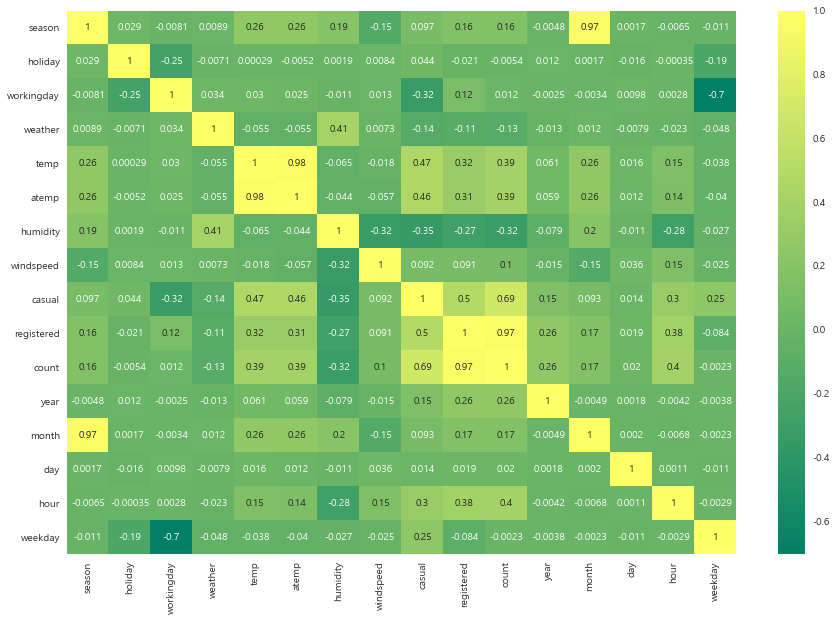

In [12]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'summer', annot = True)

+ temp와 atemp의 상관계수가 0.98로 강한 상관관계를 가지며 이는 다중공선성 문제가 있으므로 따로 처리가 필요해 보임

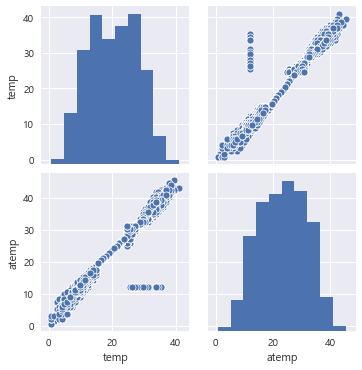

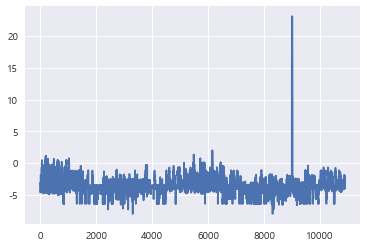

In [13]:
sns.pairplot(df[['temp', 'atemp']])
plt.figure()
plt.plot((df.temp - df.atemp))

In [14]:
ol = (df.temp - df.atemp)[df.temp - df.atemp > 5].index
df.atemp[ol]

8991    12.12
8992    12.12
8993    12.12
8994    12.12
8995    12.12
8996    12.12
8997    12.12
8998    12.12
8999    12.12
9000    12.12
9001    12.12
9002    12.12
9003    12.12
9004    12.12
9005    12.12
9006    12.12
9007    12.12
9008    12.12
9009    12.12
9010    12.12
9011    12.12
9012    12.12
9013    12.12
9014    12.12
Name: atemp, dtype: float64

In [15]:
df.drop('atemp', axis = 1, inplace = True)

+ 대체로 temp와 atemp는 강한 선형관계를 가지고 있으나 그 차이가 심한 부분이 있고 그 부분(24개)의 atemp가 모두 12.12로 대체돼있음을 확인
+ temp와 atemp의 관계는 확실하게 '독립'이 아니므로 다중공선성의 문제가 있고 atemp의 경우 체감온도라는 중요한 변수이지만 temp가 atemp를 충분히 대변할 수 있다고 판단하여 atemp 변수 삭제

#### windspeed 결측(이상)치 처리

In [16]:
from sklearn.ensemble import RandomForestRegressor

X_train = df.query("windspeed != 0")[['weather', 'temp', 'humidity', 'season', 'month', 'day']]
X_test = df.query("windspeed == 0")[['weather', 'temp', 'humidity', 'season', 'month', 'day']]
y_train = df.query("windspeed != 0")['windspeed']
y_test = df.query("windspeed == 0")['windspeed']

reg = RandomForestRegressor()
pred = reg.fit(X_train, y_train).predict(X_test)

df.loc[df.query("windspeed == 0").index, 'windspeed'] = pred

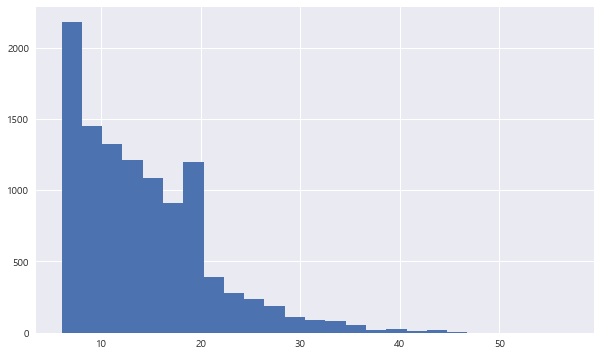

In [17]:
plt.figure(figsize = (10, 6))
plt.hist(df['windspeed'], bins = 25)
plt.show()

+ windspeed와 상관이 있을법한 날씨에 관한 변수(weather, temp, humidity)와 시간에 관한 변수(season, month, day)를 사용하여 windspeed가 0인 부분을 예측하여 채움
+ 히스토그램을 그렸을 때 windspeed가 0이었던 부분들이 잘 대체되었음을 알 수 있음

#### weather, humidity 분석
+ weather=4인 데이터가 한건으로 이는 분석에 별로 도움이 되지 않으므로 이 데이터를 weather=3으로 대체해줌

In [18]:
df.query("weather == 4")

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,1,0,1,4,8.2,86,6.0032,6,158,164,2012,1,9,18,0


In [19]:
df.loc[5631, 'weather'] = 3

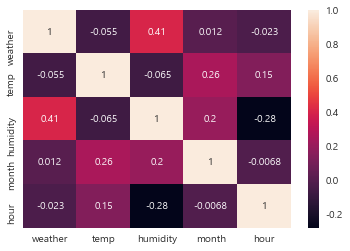

In [20]:
sns.heatmap(df[['weather', 'temp', 'humidity', 'month', 'hour']].corr(), annot = True)

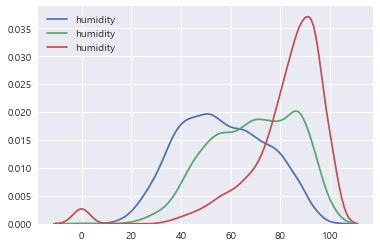

In [21]:
sns.kdeplot(df.query("weather == 1")['humidity'])
sns.kdeplot(df.query("weather == 2")['humidity'])
sns.kdeplot(df.query("weather == 3")['humidity'])

In [22]:
print(df.query("weather == 1 and humidity == 0"))
print("-"*80)
print(df.query("weather == 2 and humidity == 0"))
print("-"*80)
print(df.query("weather == 3 and humidity == 0"))

Empty DataFrame
Columns: [season, holiday, workingday, weather, temp, humidity, windspeed, casual, registered, count, year, month, day, hour, weekday]
Index: []
--------------------------------------------------------------------------------
      season  holiday  workingday  weather   temp  humidity  windspeed  \
1106       1        0           1        2  18.04         0    26.0027   
1111       1        0           1        2  13.94         0     8.9981   

      casual  registered  count  year  month  day  hour  weekday  
1106       2         109    111  2011      3   10    17        3  
1111       4          30     34  2011      3   10    22        3  
--------------------------------------------------------------------------------
      season  holiday  workingday  weather   temp  humidity  windspeed  \
1091       1        0           1        3  13.94         0    16.9979   
1092       1        0           1        3  13.94         0    16.9979   
1093       1        0          

+ 데이터 설명에서 weather은 비, 구름과 관련이 있고, humidity와 어느정도 약한 상관관계에 있으므로 humidity와 weather간의 관계 파악 중 humidity의 이상치 발견
+ weather = 1일때조차 humidity가 0인 데이터가 없는데, weather = 2, 3일때 오히려 humidity가 0인 데이터가 있어 이상치 혹은 결측치라고 판단
+ 'weather', 'temp', 'windspeed', 'season', 'month', 'day' 변수를 사용하여 예측함

In [23]:
X_train = df.query("humidity != 0")[['weather', 'temp', 'windspeed', 'season', 'month', 'day']]
X_test = df.query("humidity == 0")[['weather', 'temp', 'windspeed', 'season', 'month', 'day']]
y_train = df.query("humidity != 0")['humidity']
y_test = df.query("humidity == 0")['humidity']

reg = RandomForestRegressor()
pred = reg.fit(X_train, y_train).predict(X_test)

df.loc[df.query("humidity == 0").index, 'humidity'] = pred

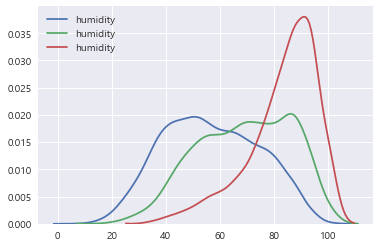

In [24]:
sns.kdeplot(df.query("weather == 1")['humidity'])
sns.kdeplot(df.query("weather == 2")['humidity'])
sns.kdeplot(df.query("weather == 3")['humidity'])

+ humidity가 0이었던 부분들이 잘 대체되었음

In [25]:
df[['casual', 'registered', 'count']].mean()

casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

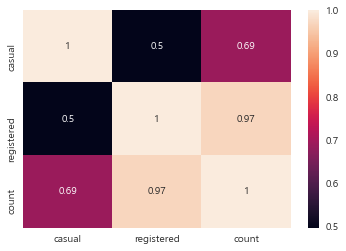

In [26]:
sns.heatmap(df[['casual', 'registered', 'count']].corr(), annot = True)

+ casual과 registered의 대수를 비교했을 때 registered가 압도적으로 크므로 count와 registered의 상관관계는 0.97로 강하지만, casual과 registered의 상관관계가 강하지 않음, 날씨, 시간대에 따라 rental의 양상이 다를것이라 추측
+ 각 column별 casual, registered, count와의 값들을 시각화를 통해 비교

#### workingday, holiday에 따라서

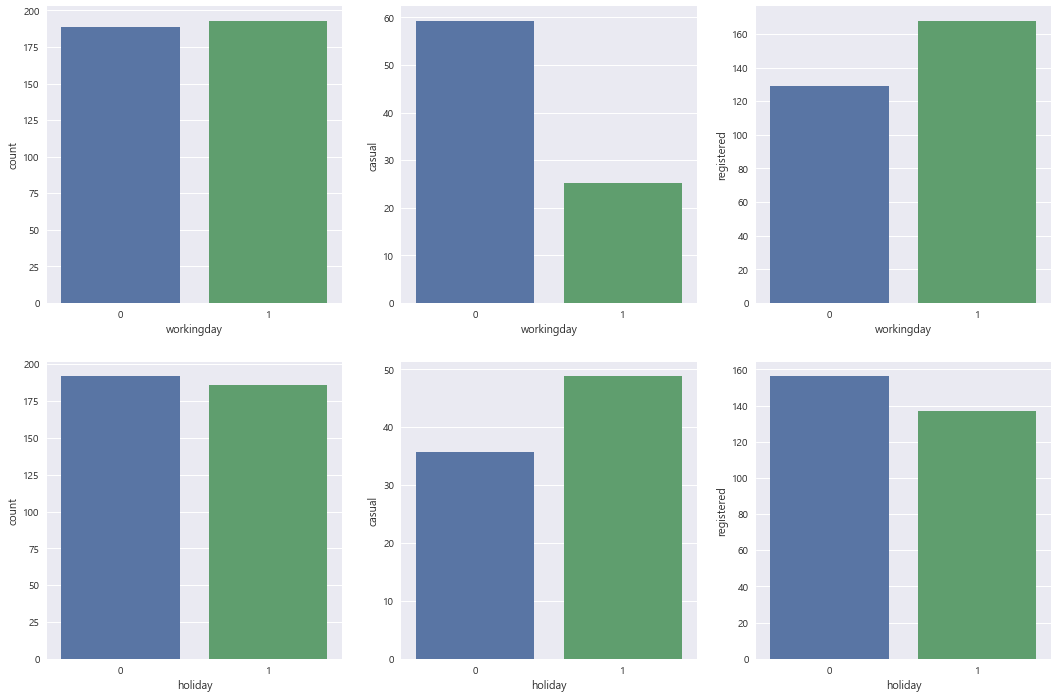

In [27]:
plt.figure(figsize = (18, 12))
plt.subplot(2, 3, 1)
sns.barplot(x='workingday',y='count',data=pd.DataFrame(df.groupby('workingday')['count'].mean()).reset_index())
plt.subplot(2, 3, 2)
sns.barplot(x='workingday',y='casual',data=pd.DataFrame(df.groupby('workingday')['casual'].mean()).reset_index())
plt.subplot(2, 3, 3)
sns.barplot(x='workingday',y='registered',data=pd.DataFrame(df.groupby('workingday')['registered'].mean()).reset_index())

plt.subplot(2, 3, 4)
sns.barplot(x='holiday',y='count',data=pd.DataFrame(df.groupby('holiday')['count'].mean()).reset_index())
plt.subplot(2, 3, 5)
sns.barplot(x='holiday',y='casual',data=pd.DataFrame(df.groupby('holiday')['casual'].mean()).reset_index())
plt.subplot(2, 3, 6)
sns.barplot(x='holiday',y='registered',data=pd.DataFrame(df.groupby('holiday')['registered'].mean()).reset_index())

+ count기준 workingday, holiday에 따라 큰 양상의 변화가 없었음 하지만 casual, registered의 경우 workingday, holiday가 각각 0, 1에 따라 양상이 뒤바뀜
+ casual의 경우 일을 하지 않는 날에, 반대로 registered의 경우 일을 하는 날에 rental 수가 더 높은것을 알 수 있음

#### 년도,월에 따라서

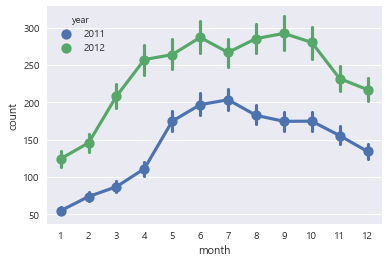

In [28]:
sns.pointplot(x = 'month', y = 'count', data = df, hue = 'year')
plt.show()

+ 2012년의 대여량의 대체적으로 높음 + 대체로 따뜻한 계절의 대여량이 더 높음

#### 시간(month, day, hour, weekday)에 따라서

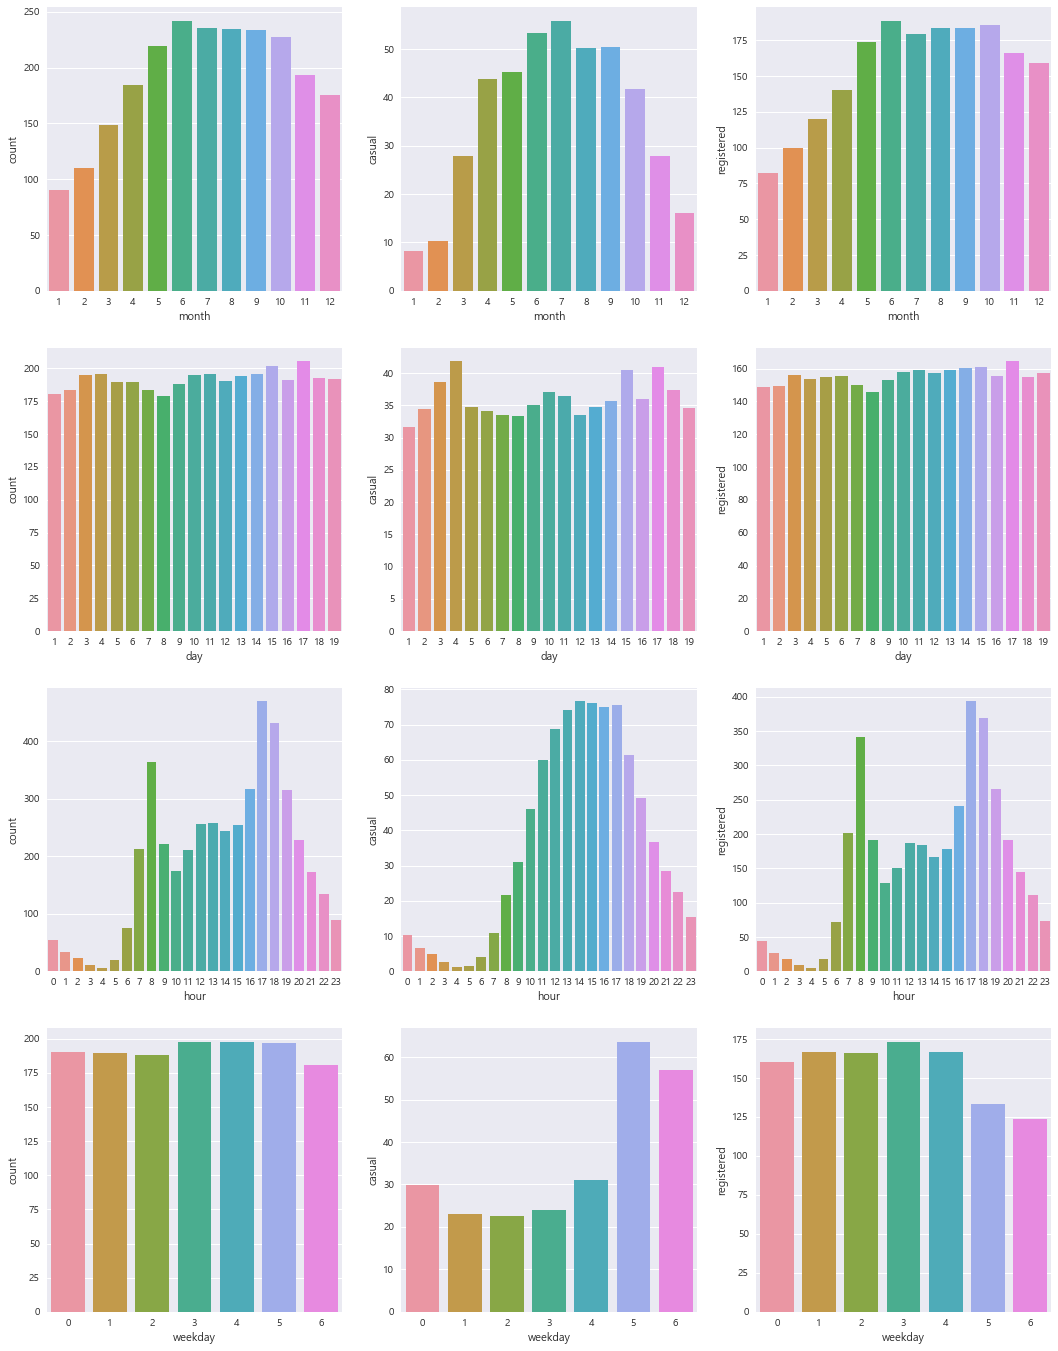

In [29]:
plt.figure(figsize = (18, 24))
plt.subplot(4, 3, 1)
sns.barplot(x='month',y='count',data=pd.DataFrame(df.groupby('month')['count'].mean()).reset_index())
plt.subplot(4, 3, 2)
sns.barplot(x='month',y='casual',data=pd.DataFrame(df.groupby('month')['casual'].mean()).reset_index())
plt.subplot(4, 3, 3)
sns.barplot(x='month',y='registered',data=pd.DataFrame(df.groupby('month')['registered'].mean()).reset_index())

plt.subplot(4, 3, 4)
sns.barplot(x='day',y='count',data=pd.DataFrame(df.groupby('day')['count'].mean()).reset_index())
plt.subplot(4, 3, 5)
sns.barplot(x='day',y='casual',data=pd.DataFrame(df.groupby('day')['casual'].mean()).reset_index())
plt.subplot(4, 3, 6)
sns.barplot(x='day',y='registered',data=pd.DataFrame(df.groupby('day')['registered'].mean()).reset_index())

plt.subplot(4, 3, 7)
sns.barplot(x='hour',y='count',data=pd.DataFrame(df.groupby('hour')['count'].mean()).reset_index())
plt.subplot(4, 3, 8)
sns.barplot(x='hour',y='casual',data=pd.DataFrame(df.groupby('hour')['casual'].mean()).reset_index())
plt.subplot(4, 3, 9)
sns.barplot(x='hour',y='registered',data=pd.DataFrame(df.groupby('hour')['registered'].mean()).reset_index())

plt.subplot(4, 3, 10)
sns.barplot(x='weekday',y='count',data=pd.DataFrame(df.groupby('weekday')['count'].mean()).reset_index())
plt.subplot(4, 3, 11)
sns.barplot(x='weekday',y='casual',data=pd.DataFrame(df.groupby('weekday')['casual'].mean()).reset_index())
plt.subplot(4, 3, 12)
sns.barplot(x='weekday',y='registered',data=pd.DataFrame(df.groupby('weekday')['registered'].mean()).reset_index())
plt.show()

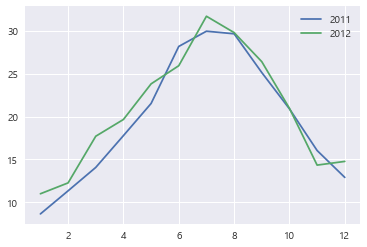

In [30]:
plt.plot(df.query("year == 2011").groupby("month")['temp'].mean(), label = '2011')
plt.plot(df.query("year == 2012").groupby("month")['temp'].mean(), label = '2012')
plt.legend()
plt.show()

In [31]:
df.groupby("month")['temp'].mean().sort_values()

month
1      9.840000
2     11.798535
12    13.831206
11    15.185752
3     15.902175
4     18.718372
10    20.933853
5     22.674079
9     25.779032
6     27.064496
8     29.736689
7     30.841711
Name: temp, dtype: float64

1. 2011년과 2012년의 월별 온도의 양상이 크게 다르지 않음 
2. month, hour에서 casual과 registered의 양상이 크게 다름
3. 앞에서 확인한 대로 일하지 않는 날의 casual의 비중이 압도적으로 컸기 때문에 casual이 당일의 날씨와 시간을 더 잘 반영할 것이라고 판단할 수 있음 + 반대로 registered의 경우 출퇴근자의 비중이 꽤 있을 것이라고 판단할 수 있음
4. 12, 1, 2월의 온도가 평균적으로 가장 낮음

1, 2, 3, 4을 토대로 현재 봄이 1월부터 시작하는것은 타당하지 않기에 봄이 3월부터 시작하도록 바꿔줄것임

#### (바꾸기 전) season에 따라서

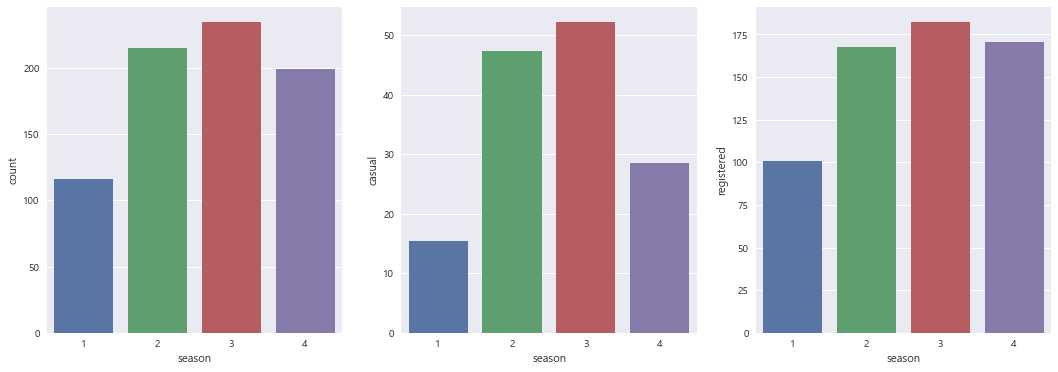

In [32]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='season',y='count',data=pd.DataFrame(df.groupby('season')['count'].mean()).reset_index())
plt.subplot(1, 3, 2)
sns.barplot(x='season',y='casual',data=pd.DataFrame(df.groupby('season')['casual'].mean()).reset_index())
plt.subplot(1, 3, 3)
sns.barplot(x='season',y='registered',data=pd.DataFrame(df.groupby('season')['registered'].mean()).reset_index())

In [33]:
def change_season(x):
    if x in [3, 4, 5]:
        return 1
    elif x in [6, 7, 8]:
        return 2
    elif x in [9, 10, 11]:
        return 3
    elif x in [12, 1, 2]:
        return 4
df['season'] = df['month'].apply(change_season)

#### (바꾼 후) season에 따라서

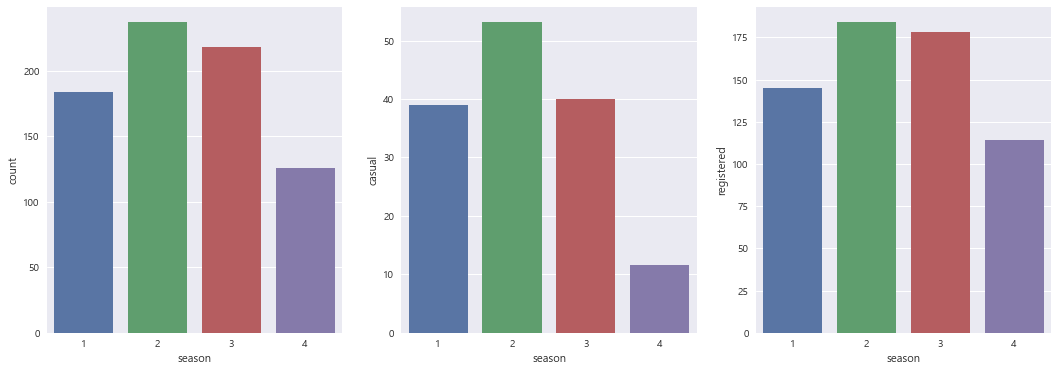

In [34]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='season',y='count',data=pd.DataFrame(df.groupby('season')['count'].mean()).reset_index())
plt.subplot(1, 3, 2)
sns.barplot(x='season',y='casual',data=pd.DataFrame(df.groupby('season')['casual'].mean()).reset_index())
plt.subplot(1, 3, 3)
sns.barplot(x='season',y='registered',data=pd.DataFrame(df.groupby('season')['registered'].mean()).reset_index())

+ 바꾸기 전 season의 경우 casual, registered모두 겨울보다 봄의 이용자가 많음. 따라서 바꾼 후 season이 계절성을 더 잘 반영한다고 볼 수 있음

#### 기상(온도, 습도, 풍속)에 따라서

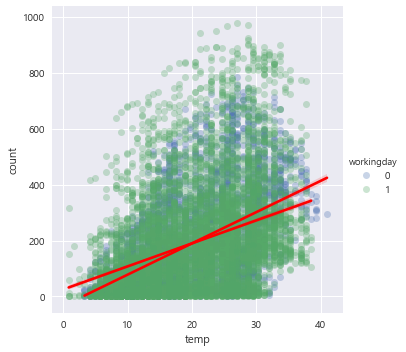

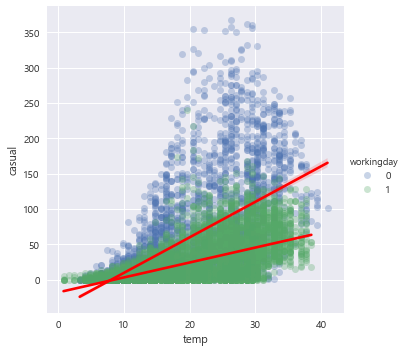

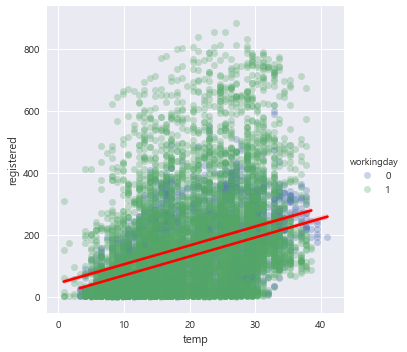

In [35]:
sns.lmplot(x = 'temp', y = 'count', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'temp', y = 'casual', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'temp', y = 'registered', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})

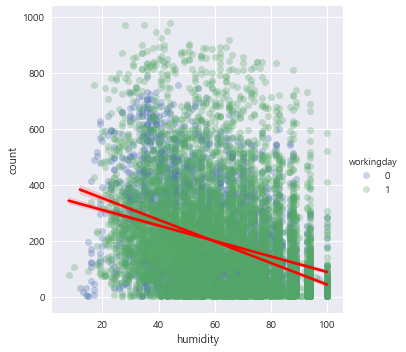

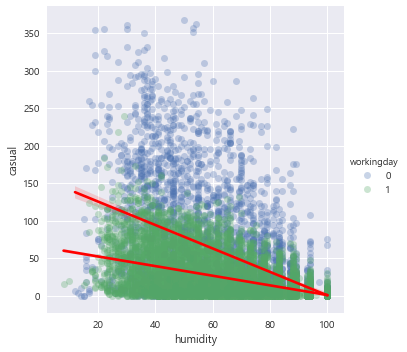

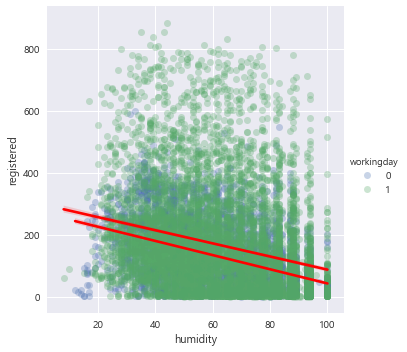

In [36]:
sns.lmplot(x = 'humidity', y = 'count', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'humidity', y = 'casual', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'humidity', y = 'registered', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})

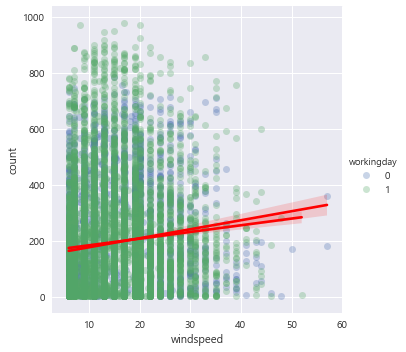

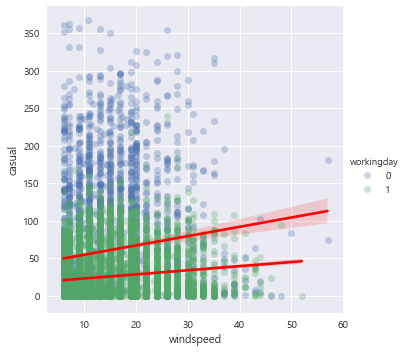

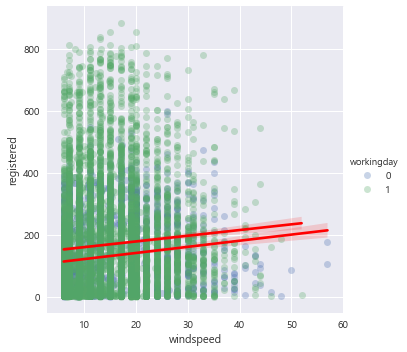

In [37]:
sns.lmplot(x = 'windspeed', y = 'count', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'windspeed', y = 'casual', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})
sns.lmplot(x = 'windspeed', y = 'registered', data = df, hue = 'workingday', scatter_kws = {'alpha' : 0.3}, line_kws = {'color' : 'red'})

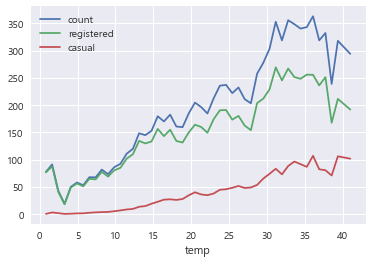

In [38]:
df.groupby("temp")[['count', 'registered', 'casual']].mean().plot()

+ 추세선을 그려보았을때 위에서 추측한대로 casual이 registered에 비해 날씨에 훤씬 민감하게 반응한다는 것을 알 수 있음
+ count, registered, casual에서 온도가 증가할수록 rental수가 증가하는 추세를 보이나 35도 이후부터는 오히려 감소하는 경향을 보임

#### 조금 더 상세히..
#### registered와 casual 각각 일하는날, 쉬는날로 나눠 시간대별로

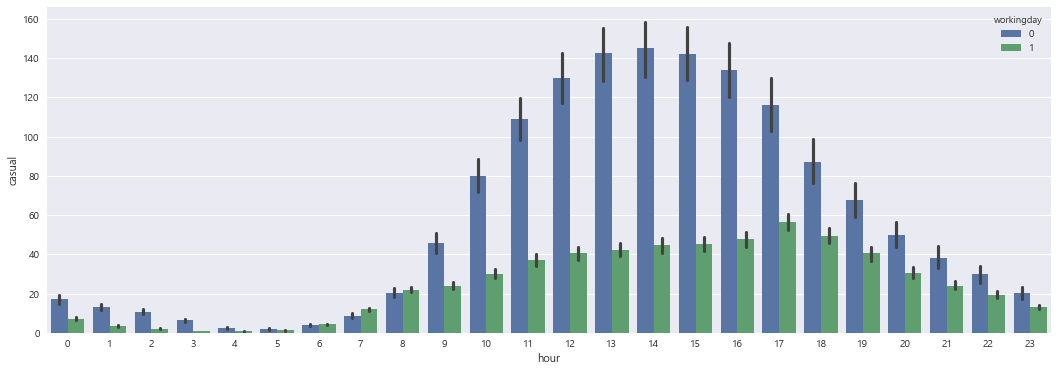

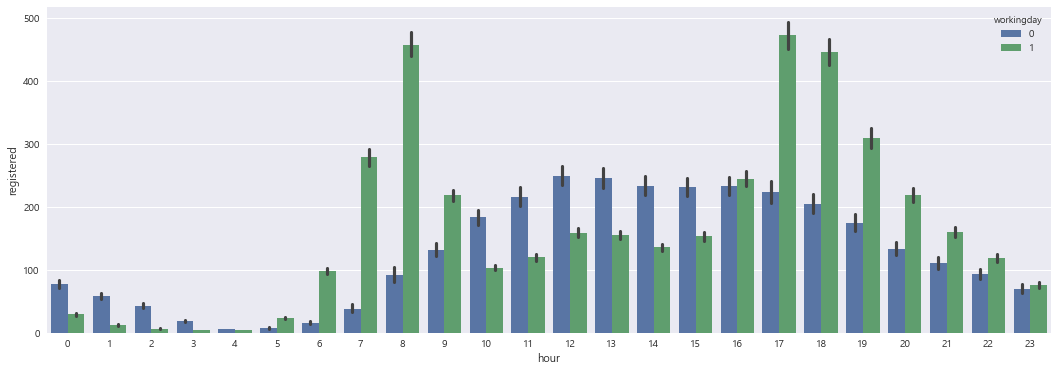

In [39]:
plt.figure(figsize = (18, 6))
sns.barplot(x = 'hour', y = 'casual', hue = 'workingday', data = df)
plt.figure(figsize = (18, 6))
sns.barplot(x = 'hour', y = 'registered', hue = 'workingday', data = df)

# Feature engineering

+ 위의 EDA결과를 토대로 registered와 casual이 각각 다르게 움직인다는 것을 알 수 있음
+ registered의 경우 날씨에는 민감하지 않으나 시간(출퇴근시간)에 영향을 많이 받음
+ casual의 경우 workingday, 날씨에는 민감하게 반응하고 근무시간에 영향을 받지 않는 대신, 일반적인 오후 시간대의 사용 빈도가 높음
+ casual의 노동자의 비율이 registered의 노동자의 비율보다 낮다고 추측할 수 있음

#### rushhour : workingday = 1일때, registered기준 출퇴근시간임을 나타내는 변수

In [40]:
df['rushhour'] = df[['hour','workingday']].apply(lambda x:int((x['workingday']== 1 and (7 <= x['hour']<= 8  or 17 <= x['hour'] <= 19))),axis=1)

In [41]:
df.groupby("rushhour")[['casual', 'registered', 'count']].mean()

,casual,registered,count
rushhour,,,
0,36.009322,116.060966,152.070288
1,36.097875,392.880876,428.978751


#### goodhour : workingday = 0일때 대체로 사용자가 많은 시간대를 나타내는 변수

In [42]:
df['goodhour'] = df[['hour','workingday']].apply(lambda x:int(x['workingday']== 0 and 10 <= x['hour'] <= 19),axis = 1)

In [43]:
df.groupby("goodhour")[['casual', 'registered', 'count']].mean()

,casual,registered,count
goodhour,,,
0,23.838809,145.696694,169.535502
1,115.304828,219.687586,334.992414


#### sohot : 대체로 temp가 증가하면 rental수가 증가하는 경향이지만, 35도를 전후로 경향이 뒤바뀜

In [44]:
df['sohot'] = df['temp'].apply(lambda x : int(x > 35))

# 정리

registered와 casual의 경향이 서로 다르다는 점에 착안하여 분석을 진행하였습니다

+ feature1 = year
+ feature2 = month
+ feature3 = day
+ feature4 = hour
+ feature5 = weekday
+ feature6 = rushhour : 출퇴근시간을 나타내는 변수
+ feature7 = goodhour : working = 0일때 대체로 사용자가 많은 시간대를 나타내는 변수
+ feature8 = sohot : 대체로 temp와 count(registered, casual)간 양의 상관관계가 나타나지만 35도 이후로 경향이 바뀜

그 외
+ season 개편 : 봄(1, 2, 3), 여름(4, 5, 6), 가을(7, 8, 9), 겨울(10, 11, 12)로 묶을 시 계절성을 잘 반영하지 못하기에 봄(3, 4, 5), 여름(6, 7, 8), 가을(9, 10, 11), 겨율(12, 1, 2)로 다시 묶어줌
+ temp와 atemp의 상관계수가 0.98로 강한 상관관계를 가짐, temp가 atemp를 충분히 반영할 수 있다고 판단하여 atemp변수 삭제
+ windspeed의경우 0이 지나치게 많았는데 결측치를 0으로 처리한듯 하였음. windspeed를 설명할 수 있는 변수가 대부분 numeric변수였기에 대표값으로 결측치를 처리하기에 무리가 있어 간단한 regressor로 예측하여 결측치를 채움
+ weather변수를 기준으로 날씨가 더 안좋을때 오히려 humidity에 0이 더 많이 섞여잇는 데이터를 발견. windspeed와 마찮가지로 humidity를 설명할 수 있는 변수가 대부분 numeric변수였기에 대표값으로 결측치를 처리하기에 무리가 있어 간단한 regressor로 예측하여 결측치를 채움